# Lab 5: Data Formats [Total: 3 points]


## Important
* Please ensure that you run the following two cells below before running any others. This will download all required files, as well as installing the necessary packages to ensure the code runs successfully. If you restart the kernel or your runtime session (in Colab), be sure to rerun this cell before running any others.
* This assignment recommends using **Google Colab**. If you are using **Anaconda Jupyter notebook/lab**, please ensure that this notebook is kept in a new folder. This is because the following commands will delete all files with the extensions .csv and .py before downloading the required files.

In [ ]:
required_files = "https://github.com/mainuddin-rony/inst447-fall2024/raw/main/assignment/lab/lab5/required_files.zip"
! rm -rf tests
! rm -f required_files.zip *.csv *.py ._*.csv
! wget $required_files && unzip -j required_files.zip
! mkdir tests && mv *.py tests
! pip install otter-grader==5.5.0

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

## Instructions

The purpose of this assignment is for you to practice with common data formats such as JSON, XML, and SQL. You will carry out these tasks in the present notebook and use the notebook to document the various steps of the exercise and answer all questions.

<div class="alert alert-info">
To grade your submission we will run your code into the autograder. The autograder will compare the value returned by your function (i.e. the student's answer) against the correct answer and if it differs it will shows you what rows / columns of the data frame are different.
</div>


## Required skills

This lab will let you practice the following skills:
- Extracting data from JSON objects
- Normalizing JSON objects for data frames
- Connecting and converting SQL results into data frames

Before you start working on it, review Chapter 13, of the &ldquo;Python 4 Everybody&rdquo; textbook and/or the notebooks posted on ELMS under &ldquo;Data Formats module&rdquo;.

## Q1

**Points**: 1

Write a function called `find_by_name` that finds the team a player plays on or the name of the city in which a stadium is located.

Your function should take three parameters:
1. A JSON string that can be either a list of players or a list of stadiums
2. A name
3. An optional key in the JSON object. If it is included, then the list of elements should be retrieved from that key.

Your function should find the object whose name attribute is equal to the passed name, and it should return a string with the value of the second attribute in the object.

### Examples

For example, if the JSON string is
```
[{'name': 'Gazinsky', 'team': 'Russia'},
 {'name': 'Dzyuba', 'team': 'Russia'},
 {'name': 'Lukaku', 'team': 'Belgium'}]
```
and the name is `Gazinsky`, then your function should return `Russia`. (The key is omitted in this case.)


If instead the JSON string is
```
{'stadiums': [{'name': 'Ekaterinburg Arena', 'city': 'Ekaterinburg'},
              {'name': 'Luzhniki Stadium', 'city': 'Moscow'},
              {'name': 'Nizhny Novgorod Stadium', 'city': 'Nizhny Novgorod'}]}
```
the name is `Luzhniki Stadium`, and the key is `stadiums`, then your function should return `Moscow`.

In [ ]:
import json

def find_by_name(json_str, name, key=None):
...

Use the cell below to run your function and see what it returns. You should probably try different inputs as well.

In [ ]:
import json

test_json_str = '[{"name":"Gazinsky","team":"Russia"},{"name":"Dzyuba","team":"Russia"},{"name":"Lukaku","team":"Belgium"}]'

test_name = 'Gazinsky'
test_key = None

print(find_by_name(test_json_str, test_name, key=test_key))

test_json_str = '{"stadiums":[{"name": "Ekaterinburg Arena","city": "Ekaterinburg"},{"name": "Luzhniki Stadium","city": "Moscow"},{"name": "Nizhny Novgorod Stadium","city": "Nizhny Novgorod"}]}'
test_name = 'Luzhniki Stadium'
test_key = 'stadiums'

print(find_by_name(test_json_str, test_name, key=test_key))

This cell will autograde your answer

In [ ]:
grader.check("q1")

## Q2

**Points**: 1

Write a function called `teams_by_continent` that compute the number of teams participating in the World Cup for each continent.

Your function should:
- take the JSON file path as a parameter,
- read the JSON file,
- convert it to data frame, and
- then aggregate its rows by the continent column.

This is what the data frame should look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num_teams</th>
    </tr>
    <tr>
      <th>continent</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Africa</th>
      <td>5</td>
    </tr>
    <tr>
      <th>Asia</th>
      <td>2</td>
    </tr>
    <tr>
      <th>Central America</th>
      <td>2</td>
    </tr>
    <tr>
      <th>Europe</th>
      <td>14</td>
    </tr>
    <tr>
      <th>Middle East</th>
      <td>2</td>
    </tr>
      <tr>
      <th>North America</th>
      <td>1</td>
    </tr>
      <tr>
      <th>Pacific</th>
      <td>1</td>
    </tr>
      <tr>
      <th>South America</th>
      <td>5</td>
    </tr>
  </tbody>
</table>  

In [ ]:
import pandas as pd
import json

def teams_by_continent(json_file):
...

Use the cell below to run your function and see what it returns.

In [ ]:
file = 'worldcup.teams.json'
teams_by_continent(file)

This cell will autograde your answer

In [ ]:
grader.check("q2")

## Q3

**Points**: 1

Write a function called `tied_matches` that, given a database of World Cup match results stored in file `worldcup2018.sqlite`, it prints the matches that resulted in a tie.

Your function should take the SQL file path as a parameter, open the database file, select all the ties, and it should return a data frame with two columns: the names of the teams that played (named `team1.name` and `team2.name` respectively).

A table called `matches` is present in the database and it looks like the following:
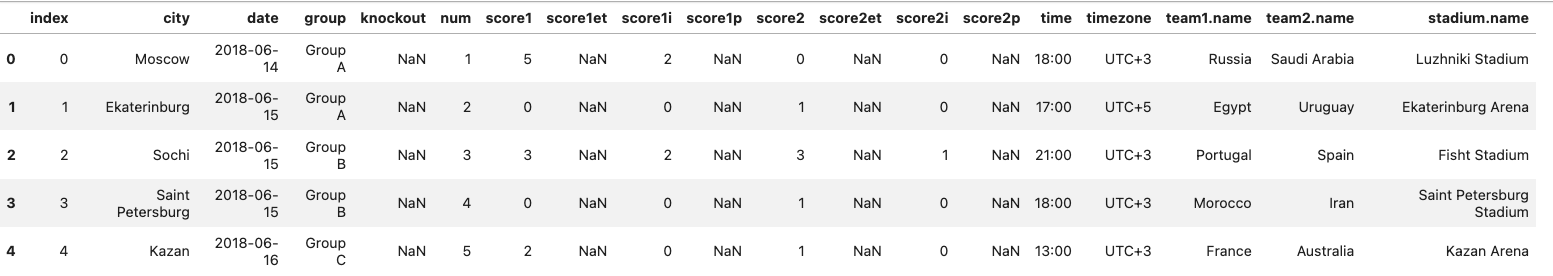

An sql query is given to you. It selects all the rows in the matches. Follow the below procedure for the question:
1. connect to sqllite3 database using pandas.
2. execute the given query. This must give you a dataframe which looks like above.
3. Create a dataframe with only the team names where the matches resulted in a tie. A match is a tie when score1 is equal to score2.

This is what your data frame should look like:

   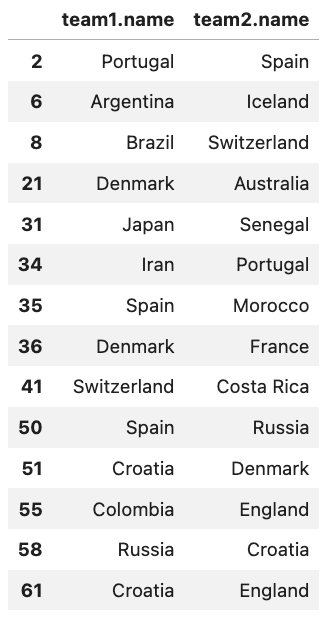

In [ ]:
import sqlite3
import pandas as pd

q = "SELECT * FROM matches"

def tied_matches(sqlite_file):
...

Use the cell below to run your function to test your function.

In [ ]:
file = "worldcup2018.sqlite"
tied_matches(file)

This cell will autograde your answer

In [ ]:
grader.check("q3")

## Submission

Don't forget to run all cells in your notebook and then save it. To save, click on `File`, then select `Save/Save Notebook`. After that, download the notebook by going to `File`, then `Download` (for Anaconda notebook), and choosing `Download .ipynb` (for Colab). Finally, submit the notebook on Gradescope using the link found on ELMS.